# US Income 

In [1]:
import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score

from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization

Using TensorFlow backend.


In [2]:
random_seed = 342
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

## Data
Import data and print some characteristics. 

In [3]:
df = pd.read_csv(r'~/tf-keras/8_US_income/adult.csv')
df = df.drop('fnlwgt', axis=1)

In [4]:
print('Number of columns:    ', df.shape[1])
print('Number of row:        ', df.shape[0])
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Number of columns:     14
Number of row:         48842

Missing values :   0

Unique values :  
 age                 74
workclass            9
education           16
educational-num     16
marital-status       7
occupation          15
relationship         6
race                 5
gender               2
capital-gain       123
capital-loss        99
hours-per-week      96
native-country      42
income               2
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   education        48842 non-null  object
 3   educational-num  48842 non-null  int64 
 4   marital-status   48842 non-null  object
 5   occupation       48842 non-null  object
 6   relationship     48842 non-null  object
 7   race             48842 non-null  object
 8   gender           48842 non-null  object
 9   capital-gain     48842 non-null  int64 
 10  capital-loss     48842 non-null  int64 
 11  hours-per-week   48842 non-null  int64 
 12  native-country   48842 non-null  object
 13  income           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


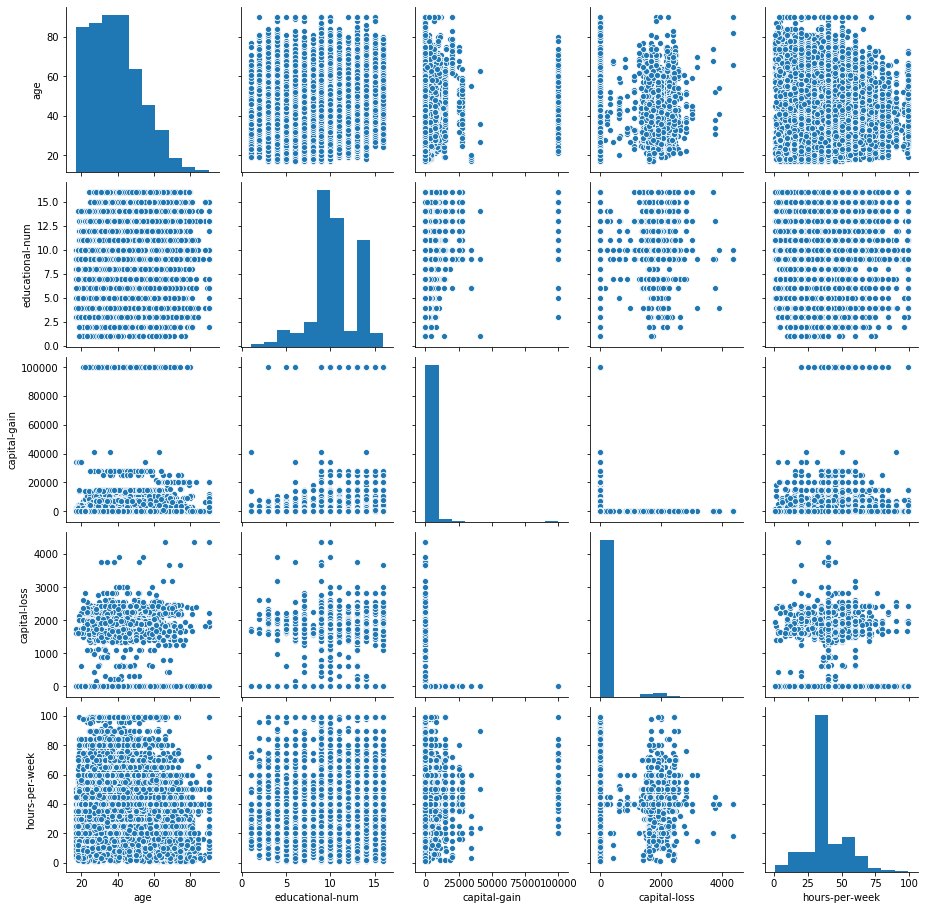

In [6]:
sns.pairplot(df)
plt.show()

In [7]:
df.income.describe()

count     48842
unique        2
top       <=50K
freq      37155
Name: income, dtype: object

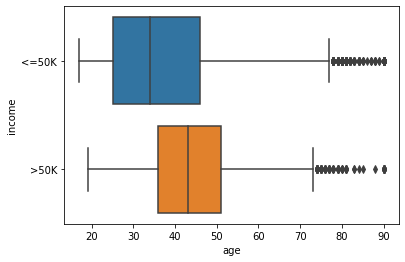

In [8]:
sns.boxplot('age', 'income', data = df)
plt.show()

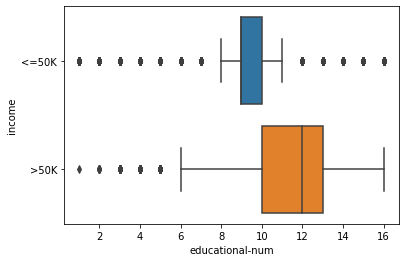

In [9]:
sns.boxplot('educational-num', 'income', data = df)
plt.show()

## Prepare data for machine learning

In [10]:
df.drop('educational-num', axis=1, inplace=True, errors='ignore')

target_col = 'income'
bin_vars = []
cat_vars = []
num_vars = []
for i in df.columns:
    if df.nunique()[i] == 2:
        bin_vars.append(i)
    elif df.nunique()[i] < 50:
        cat_vars.append(i)
    else:
        num_vars.append(i)

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in bin_vars:
      df[i] = le.fit_transform(df[i])
      print(f'column {i} converted to binary (numerical)')

column gender converted to binary (numerical)
column income converted to binary (numerical)


In [12]:
df = pd.get_dummies(data = df, columns = cat_vars)

In [13]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
scaled_df = std.fit_transform(df[num_vars])
scaled_df = pd.DataFrame(scaled_df,columns=num_vars)

In [14]:
df_orig = df.copy()
df = df.drop(columns = num_vars, axis = 1, errors='ignore')
df = df.merge(scaled_df, left_index=True,right_index=True,how = "left")
df = df.dropna()
df.describe()

,gender,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,age,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,...,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04
mean,0.668482,0.239282,0.057307,0.029319,0.064207,0.000205,0.694198,0.034704,0.079071,0.040559,...,0.001331,0.000614,0.000553,0.897424,0.001761,0.000471,1.584958e-16,2.294458e-16,7.617582e-17,9.071110e-17
std,0.470764,0.426649,0.232431,0.168701,0.245124,0.014307,0.460751,0.183030,0.269853,0.197269,...,0.036457,0.024776,0.023506,0.303407,0.041925,0.021695,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.578629e+00,-1.448035e-01,-2.171271e-01,-3.181452e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-7.763164e-01,-1.448035e-01,-2.171271e-01,-3.408696e-02
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.198790e-01,-1.448035e-01,-2.171271e-01,-3.408696e-02
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.824334e-01,-1.448035e-01,-2.171271e-01,3.694214e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.745808e+00,1.327438e+01,1.059179e+01,4.727312e+00


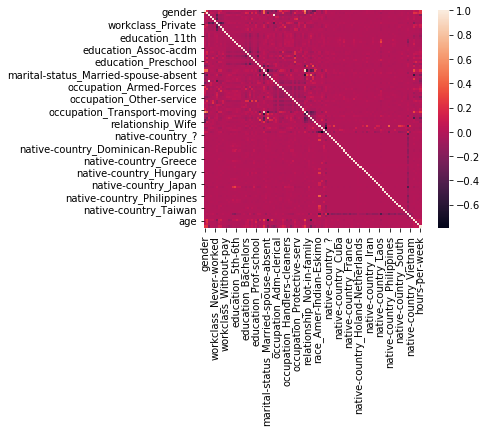

In [15]:
sns.heatmap(df.corr(), cbar=True, square=True)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df, test_size = .25 ,random_state = random_seed, stratify = df[target_col])
    
# seperating dependent and independent variables
cols    = [i for i in df.columns if i not in target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

## Logistic Regression

In [17]:
logit  = LogisticRegression(C=1.0, class_weight='balanced', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

logit.fit(train_X,train_Y)
predictions   = logit.predict(test_X)
probabilities = logit.predict_proba(test_X)
coefficients  = pd.DataFrame(logit.coef_.ravel())

In [18]:
print ("\n Classification report : \n",classification_report(test_Y,predictions))
print ("Accuracy   Score : ",accuracy_score(test_Y,predictions))
#roc_auc_score
model_roc_auc = roc_auc_score(test_Y,predictions) 
print ("AUC-ROC score : ",model_roc_auc,"\n")


 Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.80      0.86      9289
           1       0.57      0.84      0.68      2922

    accuracy                           0.81     12211
   macro avg       0.75      0.82      0.77     12211
weighted avg       0.85      0.81      0.82     12211

Accuracy   Score :  0.807796249283433
AUC-ROC score :  0.8198323269027441 



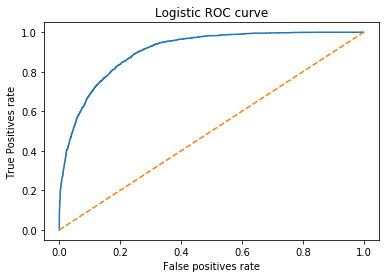

In [19]:
fpr,tpr,thresholds = roc_curve(test_Y,probabilities[:,1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False positives rate')
plt.ylabel('True Positives rate')
plt.title('Logistic ROC curve')
plt.show()

## Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc   = RandomForestClassifier(n_estimators = 100,
                                   criterion = "entropy",
                                   class_weight = 'balanced',
                                  )
rfc.fit(train_X,train_Y)

preds   = rfc.predict(test_X)
probs = rfc.predict_proba(test_X)
coeffs  = pd.DataFrame(rfc.feature_importances_)

In [21]:
print ("\n Classification report : \n",classification_report(test_Y,preds))
print ("Accuracy   Score : ",accuracy_score(test_Y,preds))
#confusion matrix
conf_matrix = confusion_matrix(test_Y,preds)
print(conf_matrix)
#roc_auc_score
model_roc_auc = roc_auc_score(test_Y,preds) 
print ("AUC-ROC score : ",model_roc_auc,"\n")


 Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.90      0.90      9289
           1       0.68      0.65      0.67      2922

    accuracy                           0.84     12211
   macro avg       0.79      0.78      0.78     12211
weighted avg       0.84      0.84      0.84     12211

Accuracy   Score :  0.8436655474572107
[[8406  883]
 [1026 1896]]
AUC-ROC score :  0.7769059825016584 



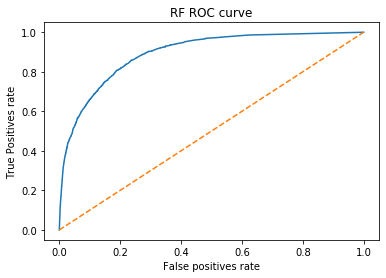

In [22]:
fpr,tpr,thresholds = roc_curve(test_Y,probs[:,1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False positives rate')
plt.ylabel('True Positives rate')
plt.title('RF ROC curve')
plt.show()

## FC Network

In [23]:
train_X = train_X.to_numpy()
train_Y = train_Y.to_numpy()
test_X = test_X.to_numpy()
test_Y = test_Y.to_numpy()
train_X.shape

(36631, 105)

In [24]:
earlystop_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights= True)

In [25]:
model1 = Sequential([
        Dense(100, activation='tanh', input_shape = train_X.shape[1:]),
        Dropout(0.2),
        Dense(100, activation='tanh', input_shape = train_X.shape[1:]),
        Dropout(0.2),
        Dense(1, activation = 'sigmoid')
        ])
model1.compile(loss = 'binary_crossentropy', optimizer = 'nadam', metrics=['accuracy'])
history1 = model1.fit(train_X, train_Y, epochs=50, validation_data=(test_X, test_Y), callbacks=[earlystop_cb])

Train on 36631 samples, validate on 12211 samples
Epoch 1/50
36631/36631 [==============================] - 2s 68us/step - loss: 0.3356 - accuracy: 0.8445 - val_loss: 0.3193 - val_accuracy: 0.8517
Epoch 2/50
36631/36631 [==============================] - 2s 53us/step - loss: 0.3215 - accuracy: 0.8483 - val_loss: 0.3188 - val_accuracy: 0.8520
Epoch 3/50
36631/36631 [==============================] - 2s 51us/step - loss: 0.3167 - accuracy: 0.8522 - val_loss: 0.3137 - val_accuracy: 0.8576
Epoch 4/50
36631/36631 [==============================] - 2s 52us/step - loss: 0.3140 - accuracy: 0.8527 - val_loss: 0.3113 - val_accuracy: 0.8523
Epoch 5/50
36631/36631 [==============================] - 2s 52us/step - loss: 0.3132 - accuracy: 0.8526 - val_loss: 0.3141 - val_accuracy: 0.8546
Epoch 6/50
36631/36631 [==============================] - 2s 58us/step - loss: 0.3087 - accuracy: 0.8555 - val_loss: 0.3108 - val_accuracy: 0.8579
Epoch 7/50
36631/36631 [==============================] - 2s 55us/st

In [26]:
model2 = Sequential([
        Dense(100, activation='relu', input_shape = train_X.shape[1:]),
        Dropout(0.2),
        Dense(100, activation='relu', input_shape = train_X.shape[1:]),
        Dropout(0.2),
        Dense(1, activation = 'sigmoid')
        ])
model2.compile(loss = 'binary_crossentropy', optimizer = 'nadam', metrics=['accuracy'])
history2 = model2.fit(train_X, train_Y, epochs=50, validation_data=(test_X, test_Y), callbacks=[earlystop_cb])

Train on 36631 samples, validate on 12211 samples
Epoch 1/50
36631/36631 [==============================] - 2s 66us/step - loss: 0.3271 - accuracy: 0.8468 - val_loss: 0.3129 - val_accuracy: 0.8578
Epoch 2/50
36631/36631 [==============================] - 2s 59us/step - loss: 0.3117 - accuracy: 0.8566 - val_loss: 0.3107 - val_accuracy: 0.8559
Epoch 3/50
36631/36631 [==============================] - 2s 60us/step - loss: 0.3080 - accuracy: 0.8586 - val_loss: 0.3101 - val_accuracy: 0.8569
Epoch 4/50
36631/36631 [==============================] - 2s 59us/step - loss: 0.3052 - accuracy: 0.8593 - val_loss: 0.3122 - val_accuracy: 0.8570
Epoch 5/50
36631/36631 [==============================] - 2s 60us/step - loss: 0.3019 - accuracy: 0.8596 - val_loss: 0.3086 - val_accuracy: 0.8577
Epoch 6/50
36631/36631 [==============================] - 2s 57us/step - loss: 0.2999 - accuracy: 0.8618 - val_loss: 0.3082 - val_accuracy: 0.8608
Epoch 7/50
36631/36631 [==============================] - 2s 56us/st

In [27]:
model3 = Sequential([
        Dense(100, activation='elu', kernel_initializer = 'he_normal', input_shape = train_X.shape[1:]),
        Dropout(0.2),
        Dense(100, activation='elu', kernel_initializer = 'he_normal', input_shape = train_X.shape[1:]),
        Dropout(0.2),
        Dense(1, activation = 'sigmoid')
        ])
model3.compile(loss = 'binary_crossentropy', optimizer = 'nadam', metrics=['accuracy'])
history3 = model3.fit(train_X, train_Y, epochs=50, validation_data=(test_X, test_Y), callbacks=[earlystop_cb])

Train on 36631 samples, validate on 12211 samples
Epoch 1/50
36631/36631 [==============================] - 2s 63us/step - loss: 0.3349 - accuracy: 0.8423 - val_loss: 0.3197 - val_accuracy: 0.8564
Epoch 2/50
36631/36631 [==============================] - 2s 57us/step - loss: 0.3174 - accuracy: 0.8512 - val_loss: 0.3134 - val_accuracy: 0.8531
Epoch 3/50
36631/36631 [==============================] - 2s 64us/step - loss: 0.3145 - accuracy: 0.8529 - val_loss: 0.3219 - val_accuracy: 0.8489
Epoch 4/50
36631/36631 [==============================] - 2s 65us/step - loss: 0.3133 - accuracy: 0.8551 - val_loss: 0.3113 - val_accuracy: 0.8546
Epoch 5/50
36631/36631 [==============================] - 2s 57us/step - loss: 0.3113 - accuracy: 0.8538 - val_loss: 0.3107 - val_accuracy: 0.8547
Epoch 6/50
36631/36631 [==============================] - 2s 59us/step - loss: 0.3101 - accuracy: 0.8555 - val_loss: 0.3110 - val_accuracy: 0.8551
Epoch 7/50
36631/36631 [==============================] - 2s 59us/st

In [28]:
model4 = Sequential([
        Dense(100, activation='elu', kernel_initializer = 'he_normal', input_shape = train_X.shape[1:]),
        Dropout(0.2),
        BatchNormalization(),
        Dense(100, activation='elu', kernel_initializer = 'he_normal', input_shape = train_X.shape[1:]),
        Dropout(0.2),
        BatchNormalization(),
        Dense(1, activation = 'sigmoid')
        ])
model4.compile(loss = 'binary_crossentropy', optimizer = 'nadam', metrics=['accuracy'])
history4 = model4.fit(train_X, train_Y, epochs=50, validation_data=(test_X, test_Y), callbacks=[earlystop_cb])

Train on 36631 samples, validate on 12211 samples
Epoch 1/50
36631/36631 [==============================] - 3s 88us/step - loss: 0.3591 - accuracy: 0.8334 - val_loss: 0.3179 - val_accuracy: 0.8544
Epoch 2/50
36631/36631 [==============================] - 3s 75us/step - loss: 0.3286 - accuracy: 0.8477 - val_loss: 0.3130 - val_accuracy: 0.8556
Epoch 3/50
36631/36631 [==============================] - 3s 82us/step - loss: 0.3236 - accuracy: 0.8497 - val_loss: 0.3119 - val_accuracy: 0.8552
Epoch 4/50
36631/36631 [==============================] - 3s 75us/step - loss: 0.3210 - accuracy: 0.8513 - val_loss: 0.3122 - val_accuracy: 0.8524
Epoch 5/50
36631/36631 [==============================] - 3s 78us/step - loss: 0.3196 - accuracy: 0.8513 - val_loss: 0.3119 - val_accuracy: 0.8568
Epoch 6/50
36631/36631 [==============================] - 3s 85us/step - loss: 0.3190 - accuracy: 0.8508 - val_loss: 0.3101 - val_accuracy: 0.8550
Epoch 7/50
36631/36631 [==============================] - 3s 84us/st

In [30]:
_, val_acc_1 = model1.evaluate(test_X, test_Y)
_, val_acc_2 = model2.evaluate(test_X, test_Y)
_, val_acc_3 = model3.evaluate(test_X, test_Y)
_, val_acc_4 = model4.evaluate(test_X, test_Y)
print(f'Test set accuracy: \n Model_1: {val_acc_1} \n Model_2: {val_acc_2} \n Model_3: {val_acc_3} \n Model_4: {val_acc_4}')

12211/12211 [==============================] - 0s 23us/step
Test set accuracy: 
 Model_1: 0.8603717684745789 
 Model_2: 0.8607812523841858 
 Model_3: 0.8606993556022644 
 Model_4: 0.8588158488273621
